In [14]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from white_demura import RGB_mask, read_and_extract_roi, apply_mask, get_signal_mapping, generate_mapping


In [17]:
green_ima_path = '/Users/codyyu/Desktop/leakage_data_WHITE_TEST/255_255_255_Y_25000.bmp'
a, b, contours, df, binary = RGB_mask(green_ima_path,'/Users/codyyu/Desktop/leakage_data_WHITE_TEST/output/contour.jpg', 8, -2100, -200)

Threshold value: 8
ID : 0
ID : 1
ID : 2
ID : 3
ID : 4
ID : 5
ID : 6
ID : 7
ID : 8
ID : 9
ID : 10
ID : 11
ID : 12
ID : 13
ID : 14
ID : 15
ID : 16
ID : 17
ID : 18
ID : 19
ID : 20
ID : 21
ID : 22
ID : 23
ID : 24
ID : 25
ID : 26
ID : 27
ID : 28
ID : 29
ID : 30
ID : 31
ID : 32
ID : 33
ID : 34
ID : 35
ID : 36
ID : 37
ID : 38
ID : 39
ID : 40
ID : 41
ID : 42
ID : 43
ID : 44
ID : 45
ID : 46
ID : 47
ID : 48
ID : 49
ID : 50
ID : 51
ID : 52
ID : 53
ID : 54
ID : 55
ID : 56
ID : 57
ID : 58
ID : 59
ID : 60
ID : 61
ID : 62
ID : 63
ID : 64
ID : 65
ID : 66
ID : 67
ID : 68
ID : 69
ID : 70
ID : 71
ID : 72
ID : 73
ID : 74
ID : 75
ID : 76
ID : 77
ID : 78
ID : 79
ID : 80
ID : 81
ID : 82
ID : 83
ID : 84
ID : 85
ID : 86
ID : 87
ID : 88
ID : 89
ID : 90
ID : 91
ID : 92
ID : 93
ID : 94
ID : 95
ID : 96
ID : 97
ID : 98
ID : 99
ID : 100
ID : 101
ID : 102
ID : 103
ID : 104
ID : 105
ID : 106
ID : 107
ID : 108
ID : 109
ID : 110
ID : 111
ID : 112
ID : 113
ID : 114
ID : 115
ID : 116
ID : 117
ID : 118
ID : 119
ID : 120
ID

In [18]:
df

,id,x,y,area,perimeter,total_signal
0,0.0,162.0,1114.0,219.5,64.870057,263.0
1,1.0,114.0,1114.0,234.5,68.526911,366.0
2,2.0,66.0,1114.0,234.5,67.355338,350.0
3,3.0,18.0,1115.0,240.0,67.112698,316.0
4,4.0,498.0,1113.0,205.0,65.941125,324.0
...,...,...,...,...,...,...
1452,1452.0,1406.0,5.0,231.0,67.941125,342.0
1453,1453.0,1358.0,5.0,228.0,67.941125,443.0
1454,1454.0,1310.0,5.0,229.0,67.941125,430.0
1455,1455.0,1262.0,6.0,226.0,67.941125,439.0


In [19]:
df_sorted = df.sort_values(by=['x', 'y'])

## Read all Clear Images

In [20]:
clear_image_4 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4_4_4_clear_200000000.bmp', -2100, -200)
clear_image_8 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/8_8_8_clear_70000000.bmp', -2100, -200)
clear_image_16 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/16_16_16_clear_16000000.bmp', -2100, -200)
clear_image_32 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/32_32_32_clear_4000000.bmp', -2100, -200)
clear_image_64 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/64_64_64_clear_700000.bmp', -2100, -200)
clear_image_128 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/128_128_128_clear_180000.bmp', -2100, -200)
clear_image_255 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/255_255_255_clear_30000.bmp', -2100, -200)

## Read all green Images

In [21]:
green_image_4 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4_4_4_Y_200000000.bmp', -2100, -200)
green_image_8 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/8_8_8_Y_40000000.bmp', -2100, -200)
green_image_16 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/16_16_16_Y_12500000.bmp', -2100, -200)
green_image_32 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/32_32_32_Y_3000000.bmp', -2100, -200)
green_image_64 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/64_64_64_Y_650000.bmp', -2100, -200)
green_image_128 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/128_128_128_Y_130000.bmp', -2100, -200)
green_image_255 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/255_255_255_Y_25000.bmp', -2100, -200)

## Gennerate mapping.

In [22]:
covered_pixels_mapping = generate_mapping(contours, green_image_255)

## Filter green Images

In [259]:
##read_and_filter_image('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/255_255_255_Z_40000.bmp', '/Users/codyyu/Desktop/leakage_data_WHITE_TEST/output/filtered_255_Z.jpg', -2100, -200)
##read_and_filter_image('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/128_128_128_Z_200000.bmp', '/Users/codyyu/Desktop/leakage_data_WHITE_TEST/output/filtered_128_Z.jpg', -2100, -200)
##read_and_filter_image('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/64_64_64_Z_1100000.bmp', '/Users/codyyu/Desktop/leakage_data_WHITE_TEST/output/filtered_64_Z.jpg', -2100, -200)
##read_and_filter_image('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/32_32_32_Z_6500000.bmp', '/Users/codyyu/Desktop/leakage_data_WHITE_TEST/output/filtered_32_Z.jpg', -2100, -200)
##read_and_filter_image('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/16_16_16_Z_21000000.bmp', '/Users/codyyu/Desktop/leakage_data_WHITE_TEST/output/filtered_16_Z.jpg', -2100, -200)
##read_and_filter_image('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/8_8_8_Z_110000000.bmp', '/Users/codyyu/Desktop/leakage_data_WHITE_TEST/output/filtered_8_Z.jpg', -2100, -200)
##read_and_filter_image('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4_4_4_Z_300000000.bmp', '/Users/codyyu/Desktop/leakage_data_WHITE_TEST/output/filtered_4_Z.jpg', -2100, -200)

## Generate Masked green Images from Clear Images

In [260]:
apply_mask('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4_4_4_clear_200000000.bmp', contours, '/Users/codyyu/Desktop/leakage_data_WHITE_TEST/output/masked_4.jpg', -2100, -200)
apply_mask('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/8_8_8_clear_70000000.bmp', contours, '/Users/codyyu/Desktop/leakage_data_WHITE_TEST/output/masked_8.jpg', -2100, -200)
apply_mask('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/16_16_16_clear_16000000.bmp', contours, '/Users/codyyu/Desktop/leakage_data_WHITE_TEST/output/masked_16.jpg', -2100, -200)
apply_mask('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/32_32_32_clear_4000000.bmp', contours, '/Users/codyyu/Desktop/leakage_data_WHITE_TEST/output/masked_32.jpg', -2100, -200)
apply_mask('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/64_64_64_clear_700000.bmp', contours, '/Users/codyyu/Desktop/leakage_data_WHITE_TEST/output/masked_64.jpg', -2100, -200)
apply_mask('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/128_128_128_clear_180000.bmp', contours, '/Users/codyyu/Desktop/leakage_data_WHITE_TEST/output/masked_128.jpg', -2100, -200)
apply_mask('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/255_255_255_clear_30000.bmp', contours, '/Users/codyyu/Desktop/leakage_data_WHITE_TEST/output/masked_255.jpg', -2100, -200)


## Generate signal mappings.

In [23]:
signal_map_4 = get_signal_mapping(clear_image_4, covered_pixels_mapping)
signal_map_8 = get_signal_mapping(clear_image_8, covered_pixels_mapping)
signal_map_16 = get_signal_mapping(clear_image_16, covered_pixels_mapping)
signal_map_32 = get_signal_mapping(clear_image_32, covered_pixels_mapping)
signal_map_64 = get_signal_mapping(clear_image_64, covered_pixels_mapping)
signal_map_128 = get_signal_mapping(clear_image_128, covered_pixels_mapping)
signal_map_255 = get_signal_mapping(clear_image_255, covered_pixels_mapping)

In [24]:
signal_map_ground_truth_4 = get_signal_mapping(green_image_4, covered_pixels_mapping)
signal_map_ground_truth_8 = get_signal_mapping(green_image_8, covered_pixels_mapping)
signal_map_ground_truth_16 = get_signal_mapping(green_image_16, covered_pixels_mapping)
signal_map_ground_truth_32 = get_signal_mapping(green_image_32, covered_pixels_mapping)
signal_map_ground_truth_64 = get_signal_mapping(green_image_64, covered_pixels_mapping)
signal_map_ground_truth_128 = get_signal_mapping(green_image_128, covered_pixels_mapping)
signal_map_ground_truth_255 = get_signal_mapping(green_image_255, covered_pixels_mapping)

In [25]:
dff = pd.DataFrame()

In [26]:
dff["4_ground_truth_mapping"] = signal_map_ground_truth_4.values()
dff["8_ground_truth_mapping"] = signal_map_ground_truth_8.values()
dff["16_ground_truth_mapping"] = signal_map_ground_truth_16.values()
dff["32_ground_truth_mapping"] = signal_map_ground_truth_32.values()
dff["64_ground_truth_mapping"] = signal_map_ground_truth_64.values()
dff["128_ground_truth_mapping"] = signal_map_ground_truth_128.values()
dff["255_ground_truth_mapping"] = signal_map_ground_truth_255.values()

In [27]:
dff["4_mapping"] = signal_map_4.values()
dff["8_mapping"] = signal_map_8.values()
dff["16_mapping"] = signal_map_16.values()
dff["32_mapping"] = signal_map_32.values()
dff["64_mapping"] = signal_map_64.values()
dff["128_mapping"] = signal_map_128.values()
dff["255_mapping"] = signal_map_255.values()

In [28]:
dff["4_diff"] = dff["4_ground_truth_mapping"] - dff["4_mapping"]
dff["8_diff"] = dff["8_ground_truth_mapping"] - dff["8_mapping"]
dff["16_diff"] = dff["16_ground_truth_mapping"] - dff["16_mapping"]
dff["32_diff"] = dff["32_ground_truth_mapping"] - dff["32_mapping"]
dff["64_diff"] = dff["64_ground_truth_mapping"] - dff["64_mapping"]
dff["128_diff"] = dff["128_ground_truth_mapping"] - dff["128_mapping"]
dff["255_diff"] = dff["255_ground_truth_mapping"] - dff["255_mapping"]


In [29]:
dff["4_to_gt_ratio"] = dff["4_mapping"] / dff["4_ground_truth_mapping"]
dff["8_to_gt_ratio"] = dff["8_mapping"] / dff["8_ground_truth_mapping"] 
dff["16_to_gt_ratio"] = dff["16_mapping"] / dff["16_ground_truth_mapping"]
dff["32_to_gt_ratio"] = dff["32_mapping"] / dff["32_ground_truth_mapping"]
dff["64_to_gt_ratio"] = dff["64_mapping"] / dff["64_ground_truth_mapping"]
dff["128_to_gt_ratio"] = dff["128_mapping"] / dff["128_ground_truth_mapping"]
dff["255_to_gt_ratio"] = dff["255_mapping"] / dff["255_ground_truth_mapping"]

In [30]:
dff["4_diff_percentage"] = ((dff['4_to_gt_ratio'].mean() - 1) * 100)
dff["8_diff_percentage"] = ((dff['8_to_gt_ratio'].mean() - 1) * 100)
dff["16_diff_percentage"] = ((dff['16_to_gt_ratio'].mean() - 1) * 100)
dff["32_diff_percentage"] = ((dff['32_to_gt_ratio'].mean() - 1) * 100)
dff["64_diff_percentage"] = ((dff['64_to_gt_ratio'].mean() - 1) * 100)
dff["128_diff_percentage"] = ((dff['128_to_gt_ratio'].mean() - 1) * 100)
dff["255_diff_percentage"] = ((dff['255_to_gt_ratio'].mean() - 1) * 100)


In [31]:
dff['4_normalized'] = dff['4_to_gt_ratio'].mean() * dff["4_ground_truth_mapping"]
dff['8_normalized'] = dff['8_to_gt_ratio'].mean() * dff["8_ground_truth_mapping"]
dff['16_normalized'] = dff['16_to_gt_ratio'].mean() * dff["16_ground_truth_mapping"]
dff['32_normalized'] = dff['32_to_gt_ratio'].mean() * dff["32_ground_truth_mapping"]
dff['64_normalized'] = dff['64_to_gt_ratio'].mean() * dff["64_ground_truth_mapping"]
dff['128_normalized'] = dff['128_to_gt_ratio'].mean() * dff["128_ground_truth_mapping"]
dff['255_normalized'] = dff['255_to_gt_ratio'].mean() * dff["255_ground_truth_mapping"]


<AxesSubplot:xlabel='index'>

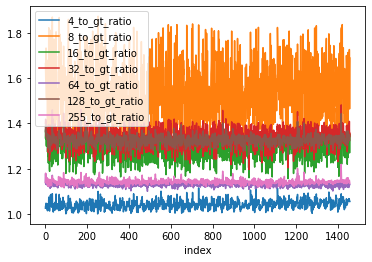

In [32]:
dff.reset_index().plot(x='index', y=["4_to_gt_ratio", "8_to_gt_ratio", "16_to_gt_ratio", "32_to_gt_ratio", "64_to_gt_ratio", "128_to_gt_ratio", "255_to_gt_ratio"])

<AxesSubplot:xlabel='index'>

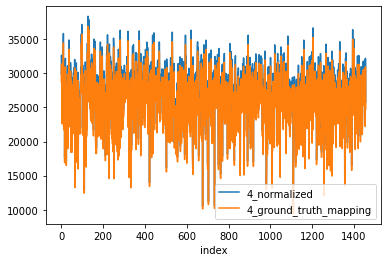

In [33]:
dff.reset_index().plot(x='index',y = ['4_normalized', '4_ground_truth_mapping'])

<AxesSubplot:xlabel='index'>

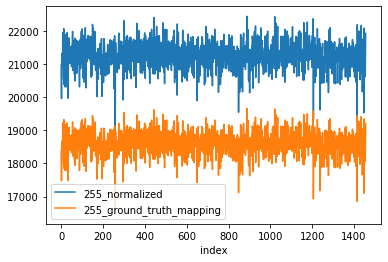

In [34]:
dff.reset_index().plot(x='index',y = ['255_normalized', '255_ground_truth_mapping'])

## 
(16_green) / mean(16_green)   = A


(16_ground_truth) / mean(16_ground_truth)   = B 


(A - B) / B 

In [35]:
new_df = pd.DataFrame()

In [36]:
new_df['4_diff'] = 100 * ((dff['4_mapping'] / dff['4_mapping'].mean()) - (dff['4_ground_truth_mapping'] / dff['4_ground_truth_mapping'].mean()))/((dff['4_ground_truth_mapping'] / dff['4_ground_truth_mapping'].mean()))
new_df['8_diff'] = 100 * ((dff['8_mapping'] / dff['8_mapping'].mean()) - (dff['8_ground_truth_mapping'] / dff['8_ground_truth_mapping'].mean()))/((dff['8_ground_truth_mapping'] / dff['8_ground_truth_mapping'].mean()))
new_df['16_diff'] = 100 * ((dff['16_mapping'] / dff['16_mapping'].mean()) - (dff['16_ground_truth_mapping'] / dff['16_ground_truth_mapping'].mean()))/((dff['16_ground_truth_mapping'] / dff['16_ground_truth_mapping'].mean()))
new_df['32_diff'] = 100 * ((dff['32_mapping'] / dff['32_mapping'].mean()) - (dff['32_ground_truth_mapping'] / dff['32_ground_truth_mapping'].mean()))/((dff['32_ground_truth_mapping'] / dff['32_ground_truth_mapping'].mean()))
new_df['64_diff'] = 100 * ((dff['64_mapping'] / dff['64_mapping'].mean()) - (dff['64_ground_truth_mapping'] / dff['64_ground_truth_mapping'].mean()))/((dff['64_ground_truth_mapping'] / dff['64_ground_truth_mapping'].mean()))
new_df['128_diff'] = 100 * ((dff['128_mapping'] / dff['128_mapping'].mean()) - (dff['128_ground_truth_mapping'] / dff['128_ground_truth_mapping'].mean()))/((dff['128_ground_truth_mapping'] / dff['128_ground_truth_mapping'].mean()))
new_df['255_diff'] = 100 * ((dff['255_mapping'] / dff['255_mapping'].mean()) - (dff['255_ground_truth_mapping'] / dff['255_ground_truth_mapping'].mean()))/((dff['255_ground_truth_mapping'] / dff['255_ground_truth_mapping'].mean()))

In [37]:
new_df['A-1_4'] = 100 * ((dff['4_mapping'] / dff['4_mapping'].mean()) - 1)
new_df['A-1_8'] = 100 * ((dff['8_mapping'] / dff['8_mapping'].mean()) - 1)
new_df['A-1_16'] = 100 * ((dff['16_mapping'] / dff['16_mapping'].mean()) - 1)
new_df['A-1_32'] = 100 * ((dff['32_mapping'] / dff['32_mapping'].mean()) - 1)
new_df['A-1_64'] = 100 * ((dff['64_mapping'] / dff['64_mapping'].mean()) - 1)
new_df['A-1_128'] = 100 * ((dff['128_mapping'] / dff['128_mapping'].mean()) - 1)
new_df['A-1_255'] = 100 * ((dff['255_mapping'] / dff['255_mapping'].mean()) - 1)

In [38]:
new_df['B-1_4'] = 100 * ((dff['4_ground_truth_mapping'] / dff['4_ground_truth_mapping'].mean()) - 1)
new_df['B-1_8'] = 100 * ((dff['8_ground_truth_mapping'] / dff['8_ground_truth_mapping'].mean()) - 1)
new_df['B-1_16'] = 100 * ((dff['16_ground_truth_mapping'] / dff['16_ground_truth_mapping'].mean()) - 1)
new_df['B-1_32'] = 100 * ((dff['32_ground_truth_mapping'] / dff['32_ground_truth_mapping'].mean()) - 1)
new_df['B-1_64'] = 100 * ((dff['64_ground_truth_mapping'] / dff['64_ground_truth_mapping'].mean()) - 1)
new_df['B-1_128'] = 100 * ((dff['128_ground_truth_mapping'] / dff['128_ground_truth_mapping'].mean()) - 1)
new_df['B-1_255'] = 100 * ((dff['255_ground_truth_mapping'] / dff['255_ground_truth_mapping'].mean()) - 1)

In [39]:
new_df

,4_diff,8_diff,16_diff,32_diff,64_diff,128_diff,255_diff,A-1_4,A-1_8,A-1_16,...,A-1_64,A-1_128,A-1_255,B-1_4,B-1_8,B-1_16,B-1_32,B-1_64,B-1_128,B-1_255
0,-1.256400,9.773197,3.733116,4.815314,0.902705,2.858596,-0.268700,10.164854,3.556823,-0.866311,...,-4.647168,-1.683363,-1.541240,11.566577,-5.662926,-4.433904,-3.118207,-5.500222,-4.415731,-1.275969
1,-0.246235,6.801732,6.574219,6.181449,4.348026,5.198724,3.379291,21.431459,13.720368,6.846386,...,-0.494449,-0.241261,-2.947592,21.731204,6.478019,0.255378,-2.985902,-4.640696,-5.171151,-6.120068
2,-1.289423,4.452314,3.385937,5.662506,0.995640,1.981368,1.231133,18.381487,13.012902,9.131141,...,2.822403,3.123644,0.678821,19.927865,8.195690,5.557046,-0.638926,1.808754,1.120083,-0.545595
3,0.836369,14.289444,4.924968,5.249293,0.135565,2.922215,1.355561,-2.427015,-1.971465,-3.903845,...,-2.459004,1.347722,1.657153,-3.236316,-14.227832,-8.414407,-5.252345,-2.591057,-1.529789,0.297558
4,0.731407,3.818882,1.431718,0.684593,0.714453,1.121565,0.709544,-11.595598,-5.705959,-5.550277,...,-1.537953,0.929334,0.711745,-12.237499,-9.174479,-6.883444,-3.578399,-2.236428,-0.190099,0.002186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,2.307469,12.399839,4.346448,4.777037,-0.220738,1.305323,-0.263506,3.713994,3.135436,-0.729842,...,-2.038409,0.586613,0.081474,1.374802,-8.242364,-4.864841,-3.382817,-1.821691,-0.709450,0.345891
1453,2.752749,1.597881,1.584508,1.667402,-0.089455,0.637932,0.539077,15.219520,11.663690,8.012976,...,2.726571,2.941156,0.951625,12.132786,9.907499,6.328197,4.193083,2.818547,2.288624,0.410336
1454,2.282778,13.858336,5.272658,5.481908,-0.037641,1.734002,0.647637,-11.927847,-2.454707,-2.266218,...,-3.997640,-1.665559,-2.387874,-13.893468,-14.327492,-7.161286,-5.493945,-3.961490,-3.341617,-3.015978
1455,1.527941,-3.447787,-1.406375,0.271800,0.117709,1.225810,0.023139,21.898101,16.380132,12.379982,...,5.340655,3.697814,0.438941,20.063600,20.535955,13.983011,8.541892,5.216805,2.442069,0.415706


In [40]:
new_df[new_df['4_diff'] < 10]

,4_diff,8_diff,16_diff,32_diff,64_diff,128_diff,255_diff,A-1_4,A-1_8,A-1_16,...,A-1_64,A-1_128,A-1_255,B-1_4,B-1_8,B-1_16,B-1_32,B-1_64,B-1_128,B-1_255
0,-1.256400,9.773197,3.733116,4.815314,0.902705,2.858596,-0.268700,10.164854,3.556823,-0.866311,...,-4.647168,-1.683363,-1.541240,11.566577,-5.662926,-4.433904,-3.118207,-5.500222,-4.415731,-1.275969
1,-0.246235,6.801732,6.574219,6.181449,4.348026,5.198724,3.379291,21.431459,13.720368,6.846386,...,-0.494449,-0.241261,-2.947592,21.731204,6.478019,0.255378,-2.985902,-4.640696,-5.171151,-6.120068
2,-1.289423,4.452314,3.385937,5.662506,0.995640,1.981368,1.231133,18.381487,13.012902,9.131141,...,2.822403,3.123644,0.678821,19.927865,8.195690,5.557046,-0.638926,1.808754,1.120083,-0.545595
3,0.836369,14.289444,4.924968,5.249293,0.135565,2.922215,1.355561,-2.427015,-1.971465,-3.903845,...,-2.459004,1.347722,1.657153,-3.236316,-14.227832,-8.414407,-5.252345,-2.591057,-1.529789,0.297558
4,0.731407,3.818882,1.431718,0.684593,0.714453,1.121565,0.709544,-11.595598,-5.705959,-5.550277,...,-1.537953,0.929334,0.711745,-12.237499,-9.174479,-6.883444,-3.578399,-2.236428,-0.190099,0.002186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,2.307469,12.399839,4.346448,4.777037,-0.220738,1.305323,-0.263506,3.713994,3.135436,-0.729842,...,-2.038409,0.586613,0.081474,1.374802,-8.242364,-4.864841,-3.382817,-1.821691,-0.709450,0.345891
1453,2.752749,1.597881,1.584508,1.667402,-0.089455,0.637932,0.539077,15.219520,11.663690,8.012976,...,2.726571,2.941156,0.951625,12.132786,9.907499,6.328197,4.193083,2.818547,2.288624,0.410336
1454,2.282778,13.858336,5.272658,5.481908,-0.037641,1.734002,0.647637,-11.927847,-2.454707,-2.266218,...,-3.997640,-1.665559,-2.387874,-13.893468,-14.327492,-7.161286,-5.493945,-3.961490,-3.341617,-3.015978
1455,1.527941,-3.447787,-1.406375,0.271800,0.117709,1.225810,0.023139,21.898101,16.380132,12.379982,...,5.340655,3.697814,0.438941,20.063600,20.535955,13.983011,8.541892,5.216805,2.442069,0.415706


<AxesSubplot:>

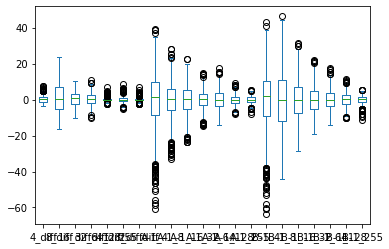

In [41]:
new_df.plot.box()

<AxesSubplot:>

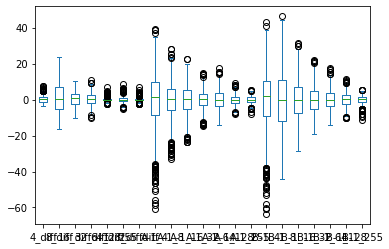

In [42]:
new_df[new_df['4_diff'] < 10].plot.box()

In [43]:
new_df[new_df['4_diff'] > 10].count()

4_diff      0
8_diff      0
16_diff     0
32_diff     0
64_diff     0
128_diff    0
255_diff    0
A-1_4       0
A-1_8       0
A-1_16      0
A-1_32      0
A-1_64      0
A-1_128     0
A-1_255     0
B-1_4       0
B-1_8       0
B-1_16      0
B-1_32      0
B-1_64      0
B-1_128     0
B-1_255     0
dtype: int64

<AxesSubplot:xlabel='index'>

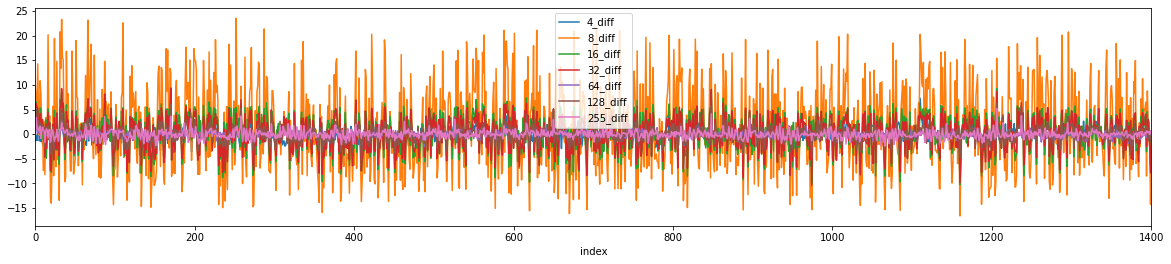

In [44]:
new_df.reset_index().plot(figsize=[20, 4],xlim=[0, 1400], x='index', y=['4_diff', '8_diff', '16_diff', '32_diff', '64_diff', '128_diff', '255_diff'])

<AxesSubplot:xlabel='index'>

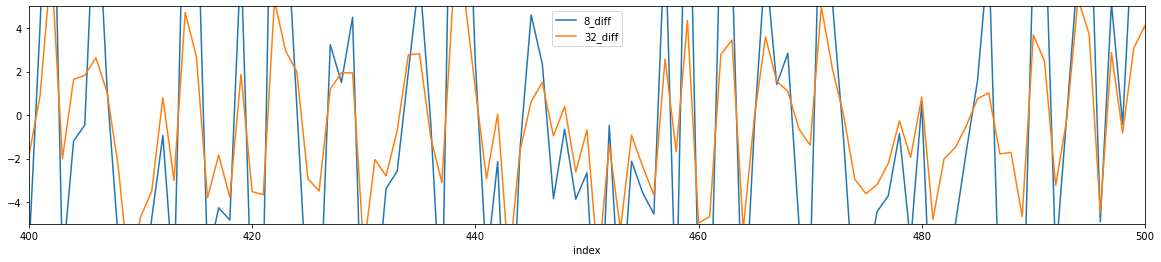

In [45]:
new_df.reset_index().plot(figsize=[20, 4],xlim=[400, 500], x='index',ylim=[-5, 5], y=['8_diff', '32_diff'])

<AxesSubplot:xlabel='index'>

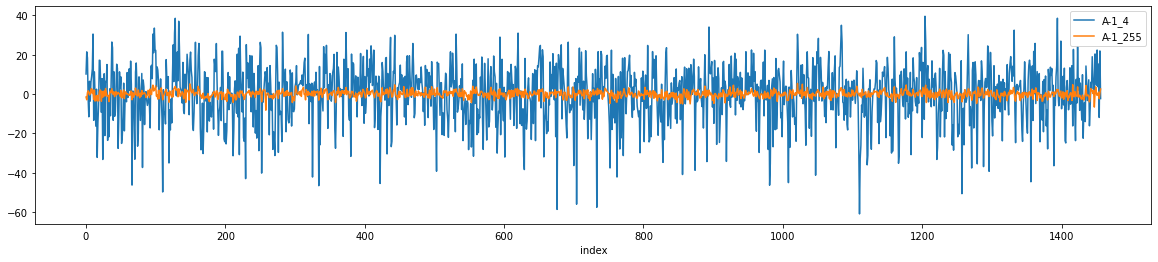

In [46]:
new_df.reset_index().plot(figsize=[20, 4], x='index', y=['A-1_4', 'A-1_255'])

<AxesSubplot:xlabel='index'>

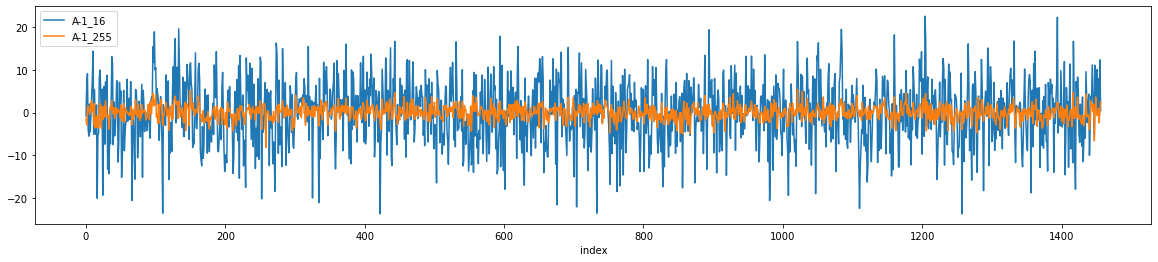

In [47]:
new_df.reset_index().plot(figsize=[20, 4], x='index', y=['A-1_16', 'A-1_255'])

<AxesSubplot:xlabel='index'>

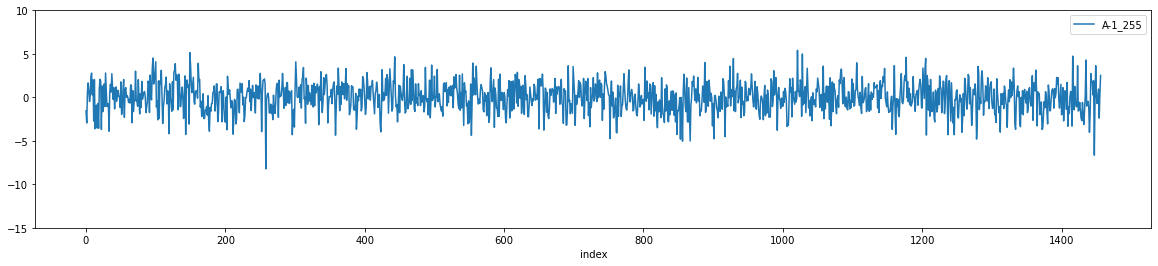

In [48]:
new_df.reset_index().plot(figsize=[20, 4], x='index', y=['A-1_255'], ylim=[-15, 10])

<AxesSubplot:xlabel='index'>

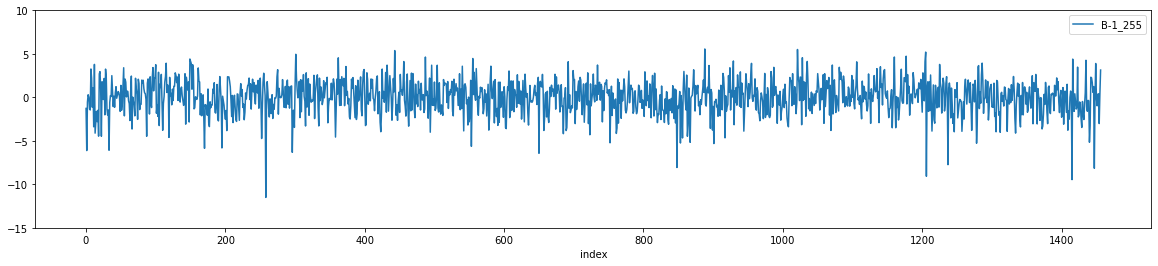

In [49]:
new_df.reset_index().plot(figsize=[20, 4], x='index', y=['B-1_255'], ylim=[-15, 10])

In [287]:
new_df[new_df['A-1_255'] > 5].count()

4_diff      9
8_diff      9
16_diff     9
32_diff     9
64_diff     9
128_diff    9
255_diff    9
A-1_4       9
A-1_8       9
A-1_16      9
A-1_32      9
A-1_64      9
A-1_128     9
A-1_255     9
B-1_4       9
B-1_8       9
B-1_16      9
B-1_32      9
B-1_64      9
B-1_128     9
B-1_255     9
dtype: int64

In [288]:
new_df[new_df['A-1_255'] < -5].count()

4_diff      35
8_diff      35
16_diff     35
32_diff     35
64_diff     35
128_diff    35
255_diff    35
A-1_4       35
A-1_8       35
A-1_16      35
A-1_32      35
A-1_64      35
A-1_128     35
A-1_255     35
B-1_4       35
B-1_8       35
B-1_16      35
B-1_32      35
B-1_64      35
B-1_128     35
B-1_255     35
dtype: int64

<AxesSubplot:xlabel='index'>

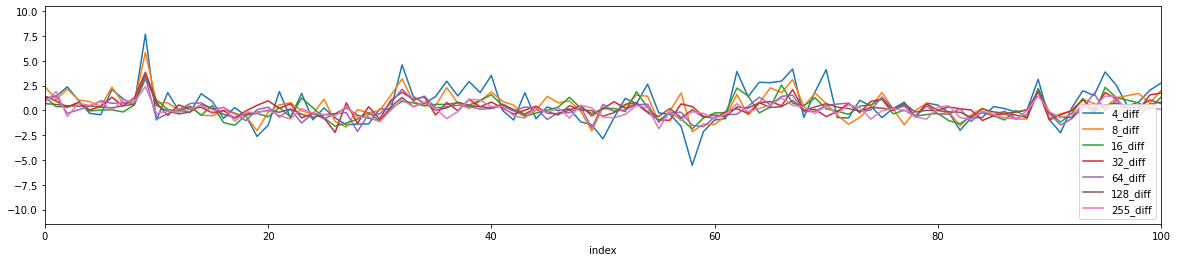

In [290]:
new_df[new_df['4_diff'] < 10].reset_index().plot(figsize=[20, 4],xlim=[0, 100], x='index', y=['4_diff', '8_diff', '16_diff', '32_diff', '64_diff', '128_diff', '255_diff'])

In [ ]:
new_df.reset_index().plot(figsize=[20, 4],xlim=[1417, 1448], x='index', y=['4_diff', '8_diff', '16_diff', '32_diff', '64_diff', '128_diff', '255_diff'])

In [131]:
dff

,4_ground_truth_mapping,8_ground_truth_mapping,16_ground_truth_mapping,32_ground_truth_mapping,64_ground_truth_mapping,128_ground_truth_mapping,255_ground_truth_mapping,4_mapping,8_mapping,16_mapping,...,128_diff_percentage,255_diff_percentage,4_normalized,8_normalized,16_normalized,32_normalized,64_normalized,128_normalized,255_normalized,test
0,13760,18592,15179,20860,19719,21452,21842,15529,19497,18799,...,1.339827,-8.81537,15815.806350,19965.724729,19095.354123,21062.970421,17349.331002,21739.419750,19916.546799,-0.015332
1,14208,18976,15634,21279,19918,21470,21778,15988,19964,19480,...,1.339827,-8.81537,16330.739580,20378.097701,19667.749282,21486.047344,17524.416801,21757.660919,19858.188636,-0.009357
2,23590,25483,19766,24571,21797,22555,22402,25705,26364,24505,...,1.339827,-8.81537,27114.452893,27365.886578,24865.852137,24810.078918,19177.613867,22857.198045,20427.180725,-0.014324
3,14472,18580,15243,20878,19525,21352,21907,16145,19846,18929,...,1.339827,-8.81537,16634.182377,19952.838073,19175.866849,21081.145564,17178.644344,21638.079923,19975.816809,-0.012685
4,13861,18309,15788,21175,20036,21800,22259,15375,19231,19613,...,1.339827,-8.81537,15931.896208,19661.814439,19861.483029,21381.035411,17628.236521,22092.082349,20296.786705,-0.012322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,16509,20521,16288,22465,20787,22143,22111,19274,22458,20757,...,1.339827,-8.81537,18975.519407,22037.254580,20490.488698,22683.587273,18288.987451,22439.677957,20161.833453,0.013200
1476,15559,19702,15592,21537,19933,21891,22559,18120,21628,19951,...,1.339827,-8.81537,17883.585102,21157.740351,19614.912806,21746.557717,17537.614223,22184.301592,20570.340594,0.017329
1477,10258,15725,14770,19657,18897,20811,21349,12483,17508,18763,...,1.339827,-8.81537,11790.591682,16886.887982,18580.827485,19848.265080,16626.112275,21089.831458,19467.006575,0.009997
1478,14119,18738,16402,21047,19469,21142,21576,17289,21055,21333,...,1.339827,-8.81537,16228.442577,20122.512369,20633.901991,21251.789955,17129.373968,21425.266286,19673.995685,0.034078


<AxesSubplot:xlabel='index'>

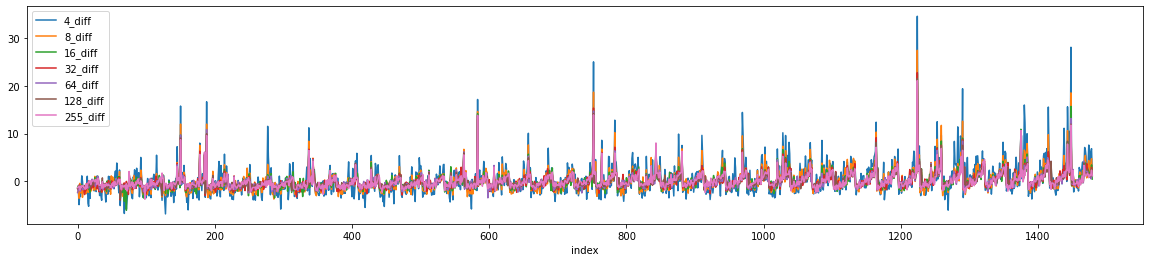

In [108]:
new_df.reset_index().plot(figsize=[20, 4], x='index', y=['4_diff', '8_diff', '16_diff', '32_diff', '64_diff', '128_diff', '255_diff'])

In [82]:
(dff['test'] * 100).mean()

0.01909679103056591

In [63]:
print ("4:   " , (dff['4_to_gt_ratio'].mean() - 1) * 100, "%")
print ("8:   " , (dff['8_to_gt_ratio'].mean() - 1) * 100, "%")
print ("16:   " , (.mean() - 1) * 100, "%")
print ("32:   " , (dff['32_to_gt_ratio'].mean() - 1) * 100, "%")
print ("64:   " , (dff['64_to_gt_ratio'].mean() - 1) * 100, "%")
print ("128:   " , (dff['128_to_gt_ratio'].mean() - 1) * 100, "%")
print ("255:   " , (dff['255_to_gt_ratio'].mean() - 1) * 100, "%")

4:    14.940453128109986 %
8:    7.388794796602327 %
16:    25.801133953888854 %
32:    0.9730125667766654 %
64:    -12.017186459151786 %
128:    1.3398272908619058 %
255:    -8.815370390652522 %


In [70]:
(((dff['16_normalized'] - dff['16_mapping']) / dff['16_mapping']))

0       0.015764
1       0.009638
2       0.014726
3       0.013042
4       0.012669
          ...   
1475   -0.012840
1476   -0.016846
1477   -0.009709
1478   -0.032771
1479   -0.003978
Length: 1480, dtype: float64

In [65]:
dff['16_to_gt_ratio']


0       1.238487
1       1.246002
2       1.239755
3       1.241816
4       1.242273
          ...   
1475    1.274374
1476    1.279566
1477    1.270345
1478    1.300634
1479    1.263036
Name: 16_to_gt_ratio, Length: 1480, dtype: float64